In [43]:
# K-MEANS CLUSTERING VERSION
# Unsupervised learning - no labels used for training, only for evaluation
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, adjusted_rand_score
import seaborn as sns


The Dataset: https://github.com/zalandoresearch/fashion-mnist

In [44]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [83]:
print(np.isnan(train_images).sum())


print(np.isnan(test_images).sum())

0
0


In [45]:
# Reduce to 5 classes (0-4)
mask_train = train_labels < 5
mask_test = test_labels < 5

train_images = train_images[mask_train]
train_labels = train_labels[mask_train]
test_images = test_images[mask_test]
test_labels = test_labels[mask_test]

In [46]:
# Class names for 5 categories
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat']

In [47]:
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

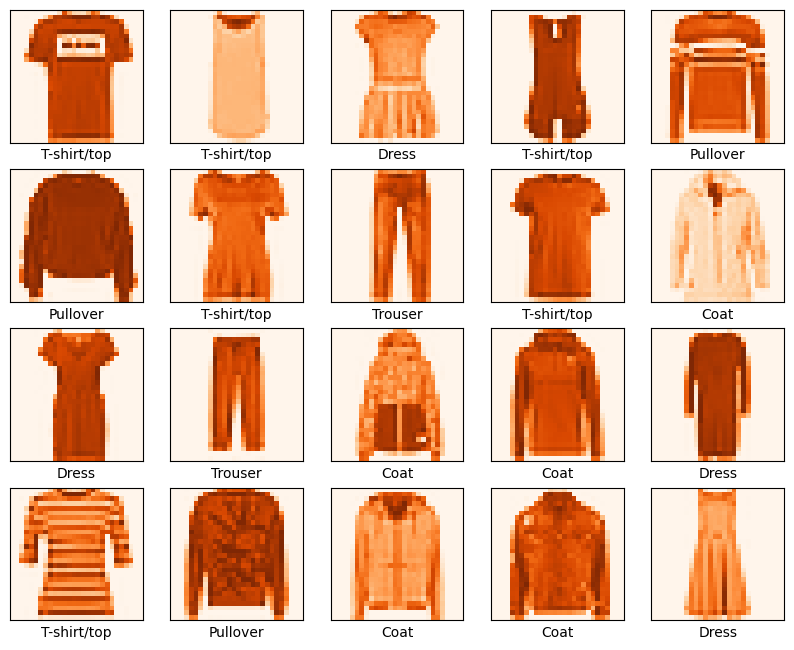

In [ ]:
# Display sample images
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='orange')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [50]:
# Flatten images for K-Means (28x28 -> 784 features)
X_train_flat = train_images.reshape(train_images.shape[0], -1)  # Shape: (n_samples, 784)
X_test_flat = test_images.reshape(test_images.shape[0], -1)     # Shape: (n_samples, 784)

In [51]:
print(f"Training data shape: {X_train_flat.shape}")
print(f"Testing data shape: {X_test_flat.shape}")

Training data shape: (30000, 784)
Testing data shape: (5000, 784)


In [52]:
# Apply K-Means clustering
print("\nTraining K-Means with 5 clusters...")
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)


Training K-Means with 5 clusters...


In [53]:
# Fit K-Means on training data (unsupervised - no labels used)
kmeans.fit(X_train_flat)

#Get cluster assignments
train_cluster_labels = kmeans.predict(X_train_flat) 
test_cluster_labels = kmeans.predict(X_test_flat) 
print("\nK-Means training completed!") 
print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")


K-Means training completed!
Cluster centers shape: (5, 784)


In [54]:
# Since K-Means doesn't know about true labels, we need to map clusters to classes
# This is done by finding the most common true label in each cluster
def map_clusters_to_classes(cluster_labels, true_labels, n_clusters=5):
    """Map cluster numbers to actual class labels"""
    #Defines a function to convert cluster IDs → class labels.
    mapping = {}
    for cluster in range(n_clusters):
        # Find indices where cluster label equals current cluster
       
        idx = np.where(cluster_labels == cluster)[0]
         #Finds samples belonging to a cluster.
        # Get the true labels for these indices
        
        true_labels_in_cluster = true_labels[idx]
        
        # Find the most common true label (mode)
        most_common = np.bincount(true_labels_in_cluster).argmax()
        #Finds the most frequent true label in the cluster.
        mapping[cluster] = most_common
    return mapping

In [55]:
# Create mappings
cluster_to_class_train = map_clusters_to_classes(train_cluster_labels, train_labels)
cluster_to_class_test = map_clusters_to_classes(test_cluster_labels, test_labels)
print("\nCluster to class mapping:")
for cluster, class_id in cluster_to_class_train.items():
    print(f"  Cluster {cluster} -> Class {class_id} ({class_names[class_id]})")



Cluster to class mapping:
  Cluster 0 -> Class 3 (Dress)
  Cluster 1 -> Class 0 (T-shirt/top)
  Cluster 2 -> Class 0 (T-shirt/top)
  Cluster 3 -> Class 4 (Coat)
  Cluster 4 -> Class 1 (Trouser)


In [56]:
# Convert cluster labels to predicted class labels using mapping
train_predicted_labels = np.array([cluster_to_class_train[cluster] for cluster in train_cluster_labels])
test_predicted_labels = np.array([cluster_to_class_test[cluster] for cluster in test_cluster_labels])



In [57]:
 #Calculate accuracy
train_accuracy = np.mean(train_predicted_labels == train_labels)
test_accuracy = np.mean(test_predicted_labels == test_labels)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.5627
Testing Accuracy: 0.5736



Visualizing cluster centers...


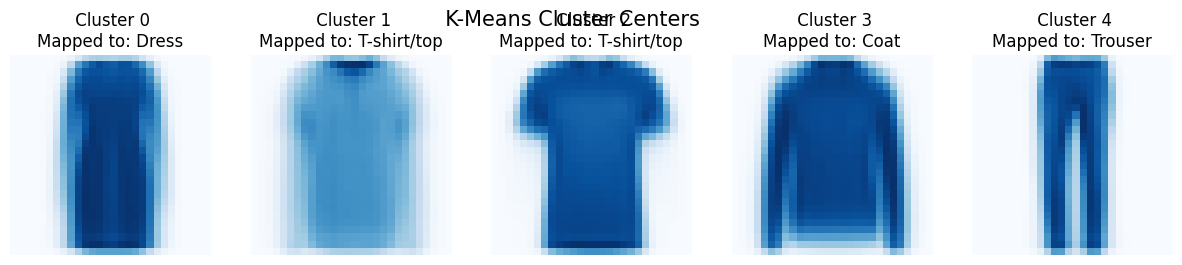

In [82]:
# Visualize cluster centers as images
print("\nVisualizing cluster centers...")
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    # Reshape cluster center to 28x28 image
    cluster_center = kmeans.cluster_centers_[i].reshape(28, 28)
    axes[i].imshow(cluster_center, cmap='Blues')
    axes[i].set_title(f' Cluster {i}\nMapped to: {class_names[cluster_to_class_train[i]]}')
    axes[i].axis('off')
plt.suptitle('  K-Means Cluster Centers  ', fontsize=15)
plt.show()


Confusion Matrix for Test Data:


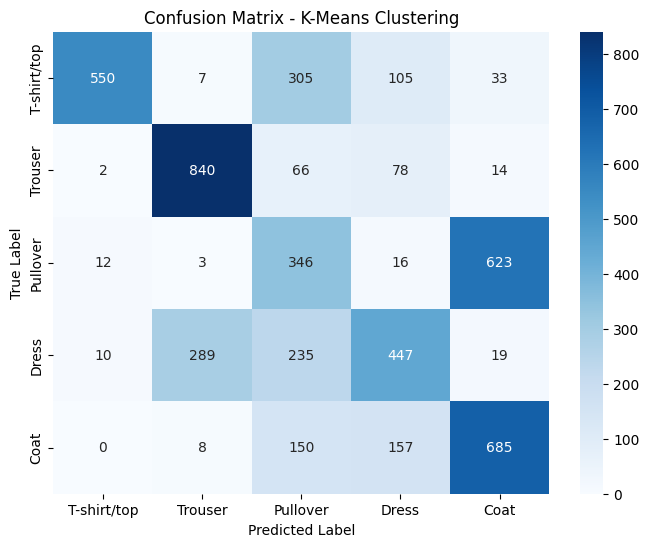

In [ ]:
# Confusion Matrix
print("\nConfusion Matrix for Test Data:")
conf_matrix = confusion_matrix(test_labels, test_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', #annot = true to shows the numbers in the boxes
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - K-Means Clustering')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [61]:
# Classification Report
print("\nClassification Report:")
print(classification_report(test_labels, test_predicted_labels, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.96      0.55      0.70      1000
     Trouser       0.73      0.84      0.78      1000
    Pullover       0.31      0.35      0.33      1000
       Dress       0.56      0.45      0.50      1000
        Coat       0.50      0.69      0.58      1000

    accuracy                           0.57      5000
   macro avg       0.61      0.57      0.58      5000
weighted avg       0.61      0.57      0.58      5000




Visualizing samples from each cluster...


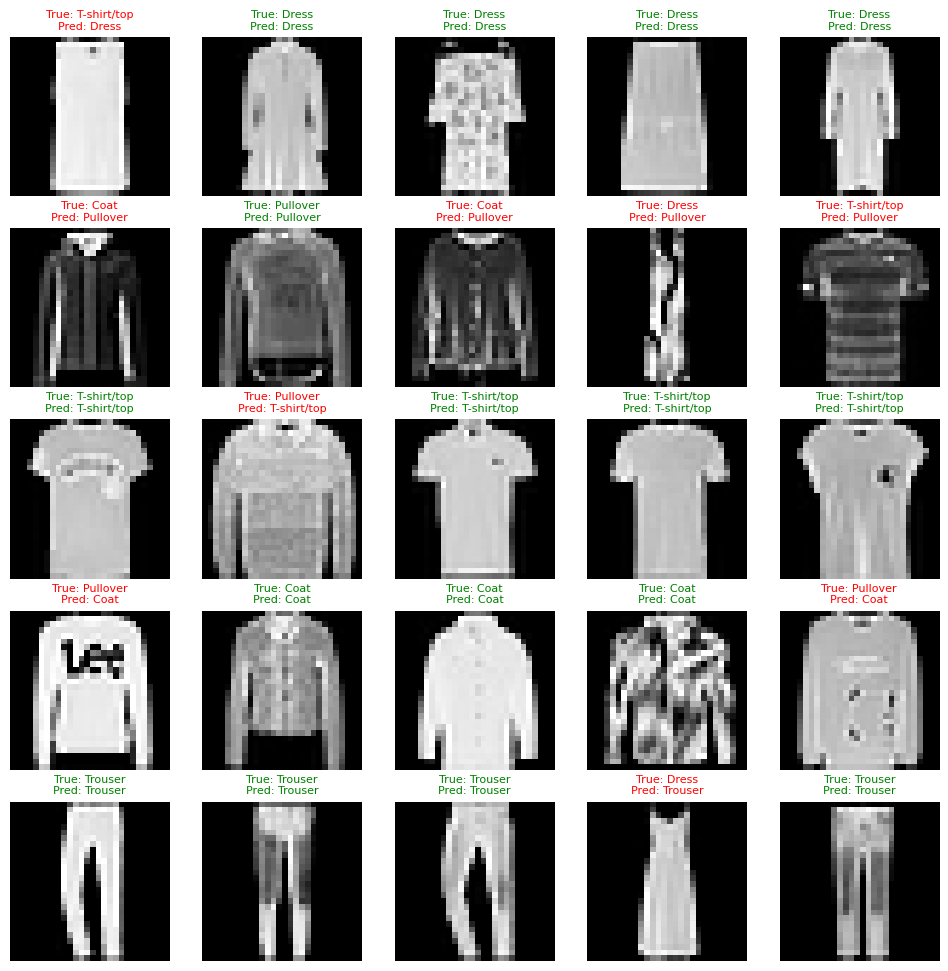

In [62]:
# Visualize samples from each cluster
print("\nVisualizing samples from each cluster...")
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
for cluster in range(5):
    # Get indices of test samples in this cluster
    cluster_indices = np.where(test_cluster_labels == cluster)[0]
    
    # Take first 5 samples
    for i in range(min(5, len(cluster_indices))):
        idx = cluster_indices[i]
        ax = axes[cluster, i]
        ax.imshow(test_images[idx], cmap='gray')
        
        # Color code: green if correctly mapped, red otherwise
        true_class = test_labels[idx]
        pred_class = test_predicted_labels[idx]
        color = 'green' if true_class == pred_class else 'red'
        
        ax.set_title(f'True: {class_names[true_class]}\nPred: {class_names[pred_class]}', 
                    fontsize=8, color=color)
        ax.axis('off')

In [63]:
 # Fill empty subplots if cluster has less than 5 samples
for i in range(len(cluster_indices), 5):
        axes[cluster, i].axis('off')

plt.suptitle('Sample Images from Each Cluster\n(Green=Correct, Red=Incorrect)', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [64]:
# Inertia (sum of squared distances to nearest cluster center)
print(f"\nK-Means Inertia: {kmeans.inertia_:.2f}")
print("Lower inertia indicates better clustering.")


K-Means Inertia: 897613.18
Lower inertia indicates better clustering.
